首先下载石头剪刀布的训练集和测试集：

In [11]:
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/rps.zip -O /content/drive/MyDrive/Project3_Lab5/rps.zip

!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/rps-test-set.zip -O /content/drive/MyDrive/Project3_Lab5/rps-test-set.zip

/content/drive/MyDrive/Project3_Lab5/rps.zip: Input/output error
--2025-05-28 01:31:20--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/content/drive/MyDrive/Project3_Lab5/rps-test-set.zip’

/content/drive/MyDr 100%[===================>]  28.15M  46.6MB/s    in 0.6s    

2025-05-28 01:31:21 (46.6 MB/s) - ‘/content/drive/MyDrive/Project3_Lab5/rps-test-set.zip’ saved [29516758/29516758]



然后解压下载的数据集

In [12]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/Project3_Lab5/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Project3_Lab5/')
zip_ref.close()


local_zip = '/content/drive/MyDrive/Project3_Lab5/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Project3_Lab5/')
zip_ref.close()


In [13]:
rock_dir = os.path.join('/content/drive/MyDrive/Project3_Lab5/rps/rock')
paper_dir = os.path.join('/content/drive/MyDrive/Project3_Lab5/rps/paper')
scissors_dir = os.path.join('/content/drive/MyDrive/Project3_Lab5/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper06-072.png', 'paper06-073.png', 'paper06-074.png', 'paper06-075.png', 'paper06-076.png', 'paper06-077.png', 'paper06-078.png', 'paper06-079.png', 'paper06-080.png', 'paper06-081.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


各打印两张石头剪刀布训练集图片

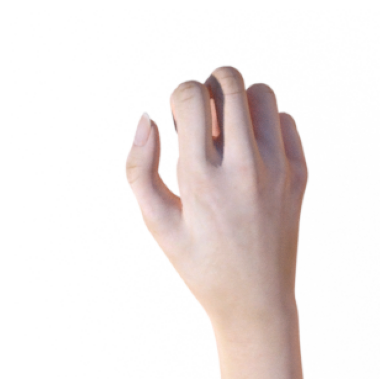

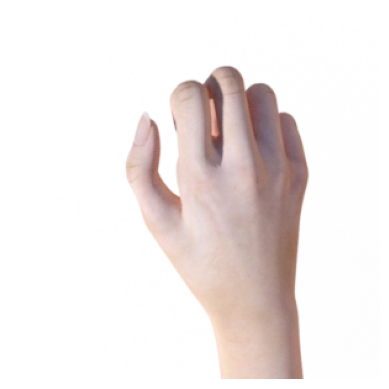

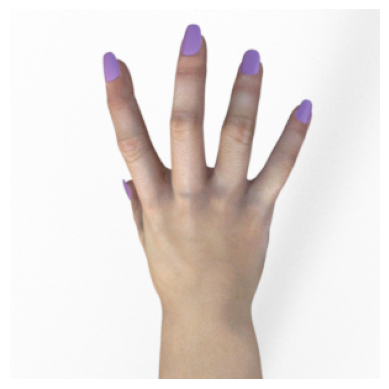

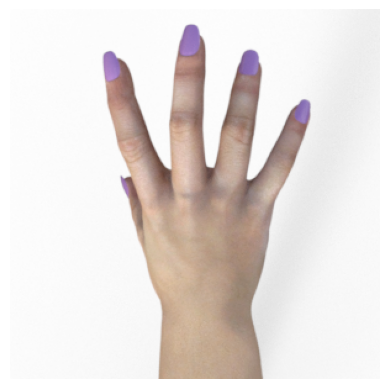

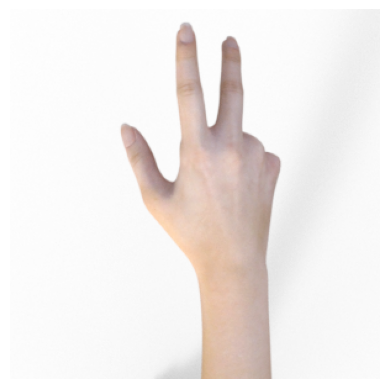

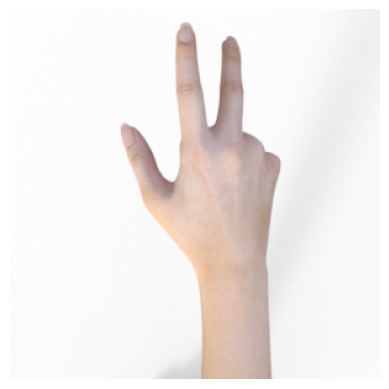

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

调用TensorFlow的keras进行数据模型的训练和评估。Keras是开源人工神经网络库，TensorFlow集成了keras的调用接口，可以方便的使用。

In [15]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/Project3_Lab5/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/Project3_Lab5/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])



model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.3437 - loss: 1.1420 - val_accuracy: 0.4919 - val_loss: 1.0961
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.3606 - loss: 1.0956 - val_accuracy: 0.3333 - val_loss: 1.1291
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4101 - loss: 1.0902 - val_accuracy: 0.5511 - val_loss: 0.9783
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4775 - loss: 1.0288 - val_accuracy: 0.7634 - val_loss: 0.7376
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4997 - loss: 1.1001 - val_accuracy: 0.8414 - val_loss: 0.5965
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6214 - loss: 0.8233 - val_accuracy: 0.7339 - val_loss: 0.4531
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6831 - loss: 0.6940 - val_accuracy: 0.9194 - val_loss: 0.3983
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6399 - loss: 0.8378 - val_accuracy: 0.8495 - val_loss:

完成模型训练之后，我们绘制训练和验证结果的相关信息。

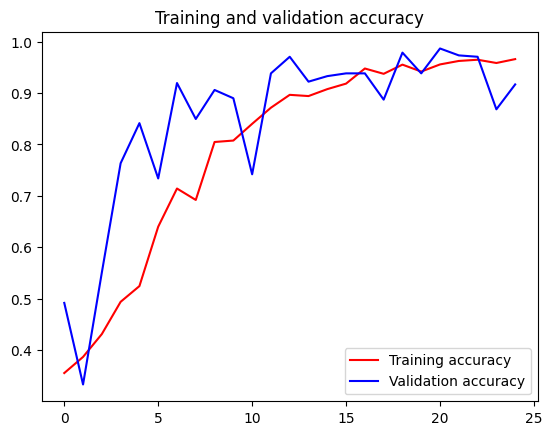

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
